# Simple Linear Regression
---


In [1]:
## imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_palette("pastel")

import datetime as dt
import eda_functions as eda

import scipy
from scipy import stats
## For encoding
#from sklearn.preprocessing import LabelEncoder

# Import ols function
from statsmodels.formula.api import ols
import statsmodels.api as sm

import warnings
warnings.filterwarnings("ignore")


In [2]:
df = sns.load_dataset("penguins")

## EDA

In [3]:
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [5]:
df.dropna(inplace=True)

In [6]:
eda.miss_df(df)

,Total,Percent
species,0,0.0
island,0,0.0
bill_length_mm,0,0.0
bill_depth_mm,0,0.0
flipper_length_mm,0,0.0
body_mass_g,0,0.0
sex,0,0.0


For the purposes of our analysis on **Adelie and Gentoo penguins**, will be dropping any missing values from the dataset. 

**Docs** [`dropna()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html) and [`reset_index()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.reset_index.html). 

The `reset_index()` function resets the index values for the rows in the dataframe. Typically, you use `reset_index()` after you've finished manipulating the dataset. By setting `inplace=True`, you will not create a new DataFrame object. By setting `drop=True`, you will not insert a new index column into the DataFrame object.

In [7]:
subDf = df#[ df[ 'species' ] != 'Chinstrap' ]
subDf.reset_index(inplace=True, drop=True)

In [8]:
subDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.3+ KB


In [9]:
## Species by island hist vertical
sp_island = subDf.groupby(['island', 'species'])['species'].count()
pd.DataFrame(sp_island)

species
island    species           
Biscoe    Adelie          44
          Gentoo         119
Dream     Adelie          55
          Chinstrap       68
Torgersen Adelie          47

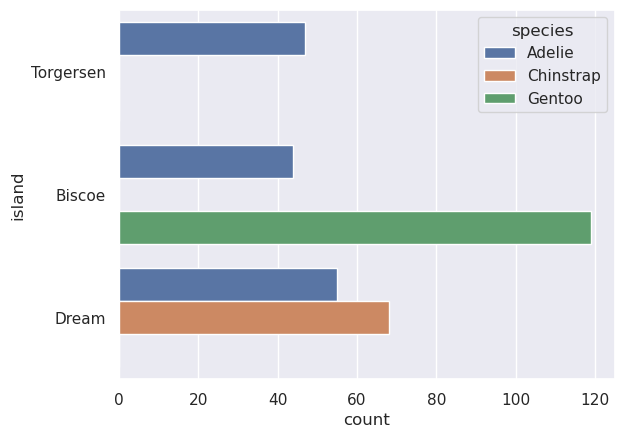

In [10]:
sns.countplot(data=subDf, y='island', hue='species');

In [11]:
## Species by sex
sp_sx= subDf.groupby(['species', 'sex'])['sex'].count()
pd.DataFrame(sp_sx)

sex
species   sex        
Adelie    Female   73
          Male     73
Chinstrap Female   34
          Male     34
Gentoo    Female   58
          Male     61

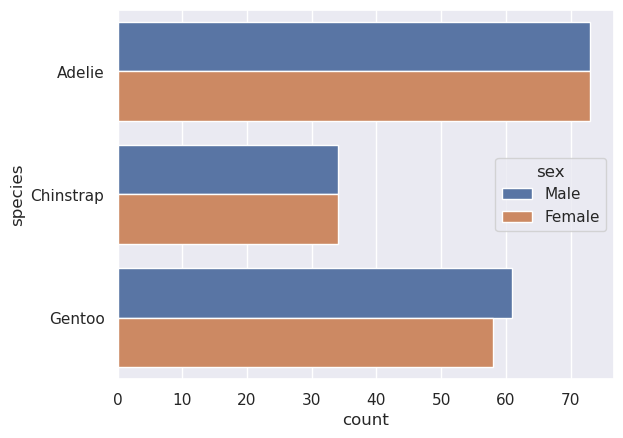

In [12]:
sns.countplot(data=subDf, y='species', hue='sex');

In [13]:
## detailed scatterplots
## bill_lenght_mm and body_mass_g 
## flipper_lenght_mm and body_mass_g
## bill_lenght_mm and flipper_lenght_mm

<AxesSubplot:xlabel='bill_length_mm', ylabel='body_mass_g'>

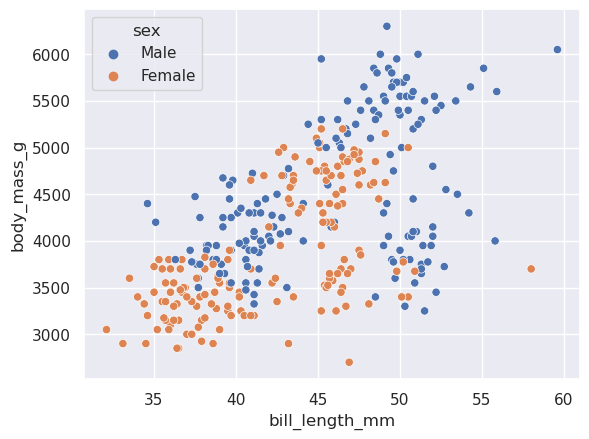

In [14]:
sns.scatterplot(x='bill_length_mm', y='body_mass_g', hue='sex', data=subDf) 

<AxesSubplot:xlabel='flipper_length_mm', ylabel='body_mass_g'>

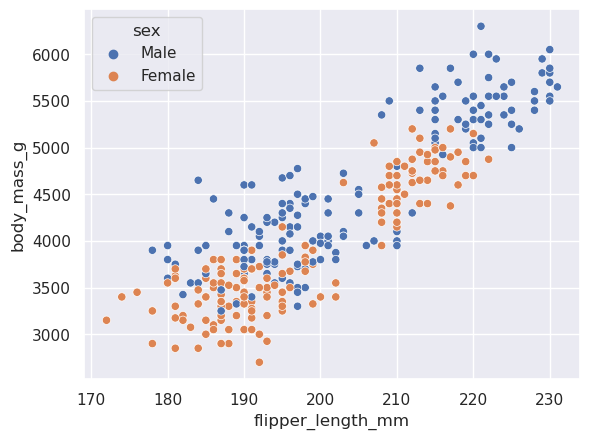

In [15]:
sns.scatterplot(x='flipper_length_mm', y='body_mass_g', hue='sex', data=subDf) 

<AxesSubplot:xlabel='bill_length_mm', ylabel='flipper_length_mm'>

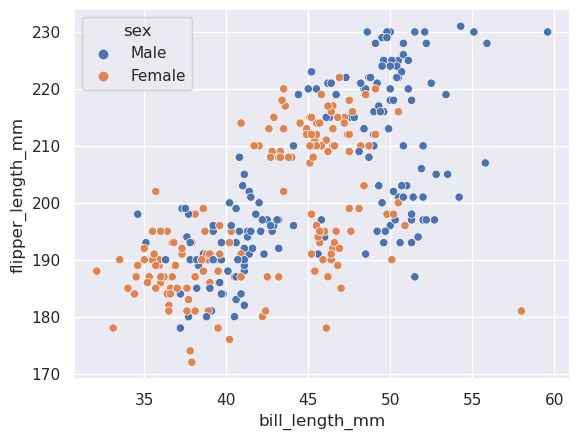

In [16]:
sns.scatterplot(x='bill_length_mm', y='flipper_length_mm', hue='sex', data=subDf) 

In [17]:
eda.empirical(subDf, 'bill_length_mm')

,bill_length_mm,empirical_rule_suggest,difference
Frac of the values within +/- 1 SD from the mean,0.60,0.680,0.080
Frac of the values within +/- 2 SD from the mean,0.98,0.950,0.030
Frac of the values within +/- 3 SD from the mean,1.00,0.997,0.003


In [18]:
eda.empirical(subDf, 'body_mass_g')

,body_mass_g,empirical_rule_suggest,difference
Frac of the values within +/- 1 SD from the mean,0.65,0.680,0.030
Frac of the values within +/- 2 SD from the mean,0.97,0.950,0.020
Frac of the values within +/- 3 SD from the mean,1.00,0.997,0.003


In [19]:
eda.empirical(subDf, 'flipper_length_mm')

,flipper_length_mm,empirical_rule_suggest,difference
Frac of the values within +/- 1 SD from the mean,0.64,0.680,0.040
Frac of the values within +/- 2 SD from the mean,0.97,0.950,0.020
Frac of the values within +/- 3 SD from the mean,1.00,0.997,0.003


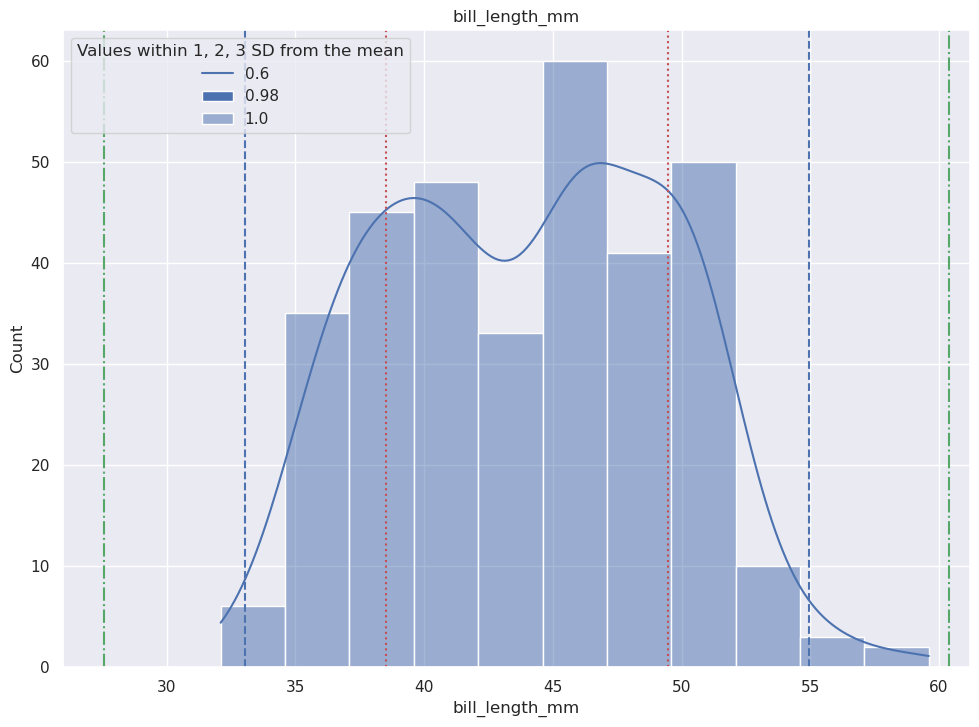

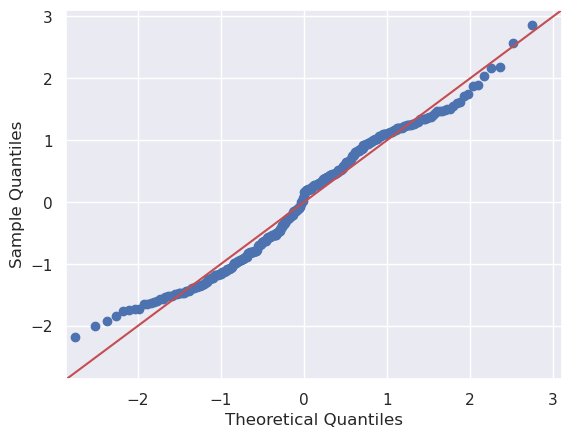

In [20]:
eda.distribution(subDf, 'bill_length_mm')

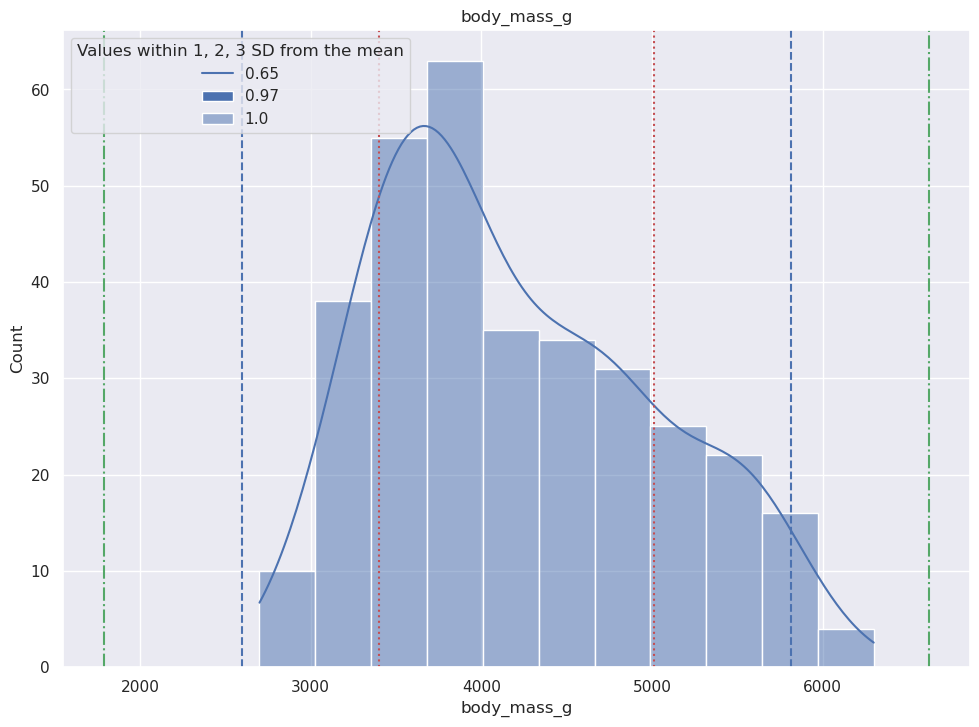

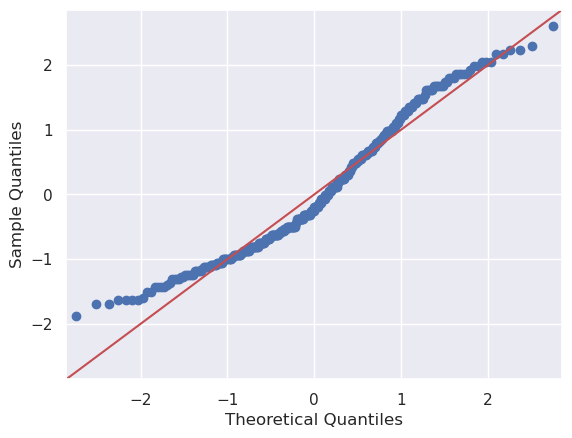

In [21]:
eda.distribution(subDf, 'body_mass_g')

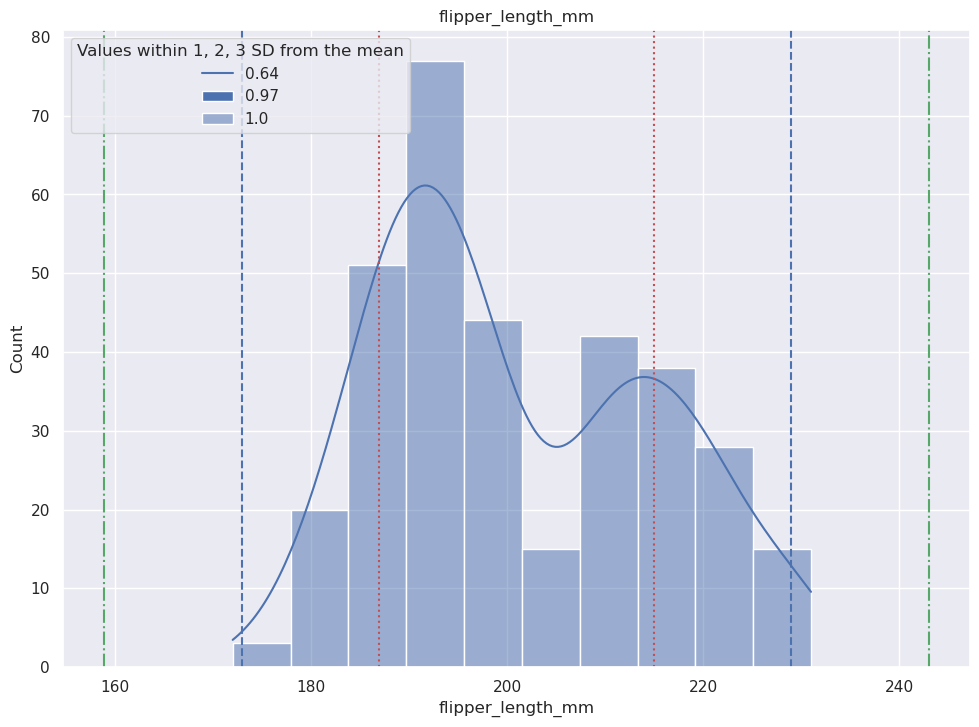

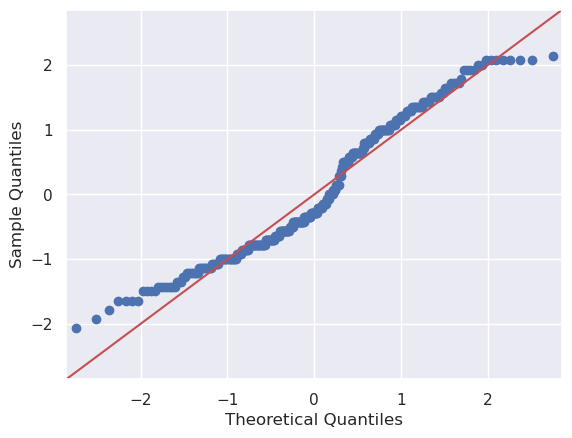

In [22]:
eda.distribution(subDf, 'flipper_length_mm')

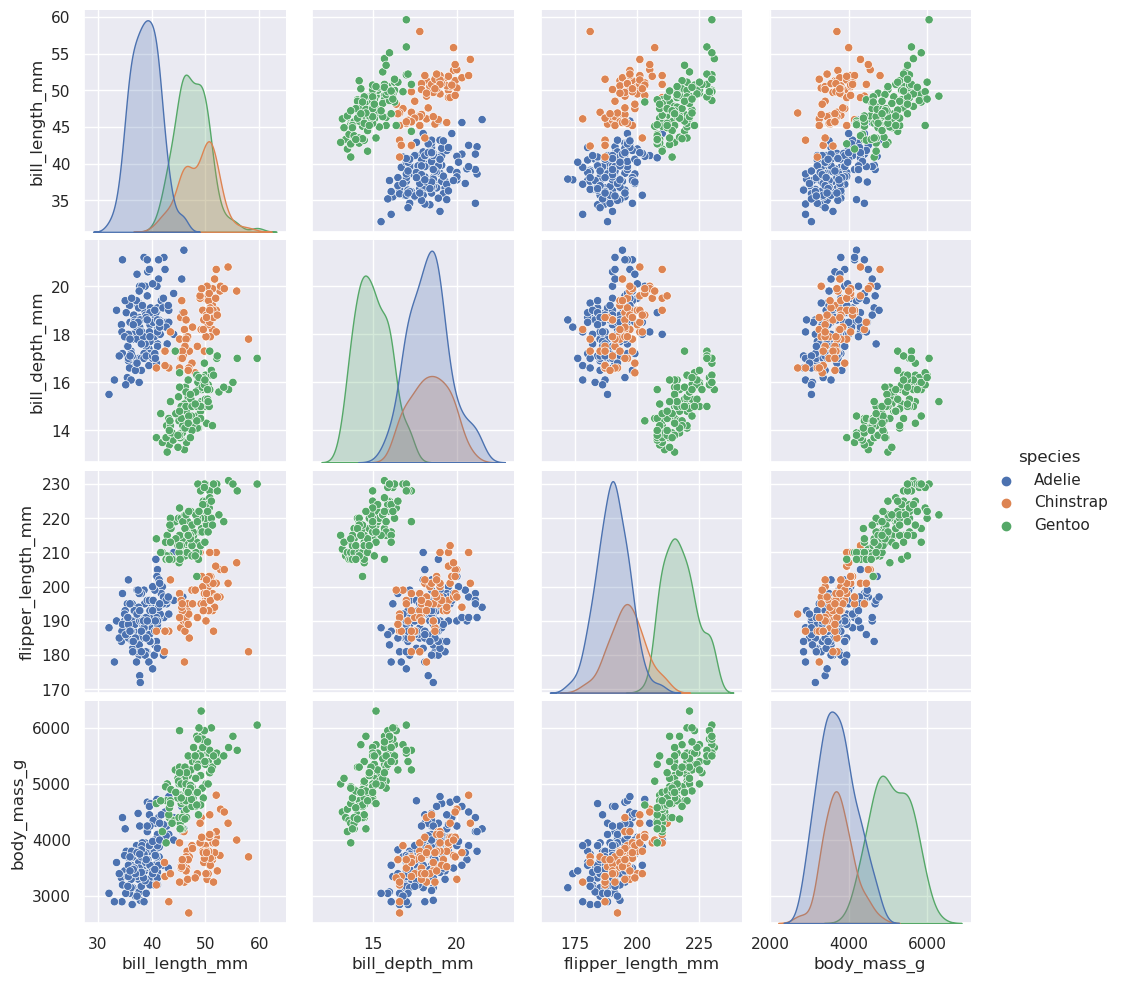

In [23]:
## Scatter plot and distributions.
sns.pairplot(subDf, hue='species');

**Notes** from the scatter plot:
 * `bill_lenght_mm` and `body_mass_g` seems to have some linear relationship. Also,
 * `flipper_lenght_mm` and  `body_mass_g`, and
 * `bill_lenght_mm` and `flipper_lenght_mm`

Model Construction
---

Based on the above scatterplots, you could probably run a simple linear regression on any of the three relationships identified. For this part of the course, you will focus on the relationship between bill length (mm) and body mass (g).

To do this, you will first subset the variables of interest from the dataframe. You can do this by using double square brackets `[[]]`, and listing the names of the columns of interest.

In [24]:
# Subset Data
ols_data = subDf[["bill_length_mm", "body_mass_g"]]

Next, you can construct the linear regression formula, and save it as a string. Remember that the y or dependent variable comes before the `~`, and the x or independent variables comes after the `~`.

**Note:** The names of the x and y variables have to exactly match the column names in the dataframe.

In [25]:
# Write out formula
ols_formula = "body_mass_g ~ bill_length_mm"

Lastly, build the simple linear regression model in `statsmodels` using the `ols()` function. Import the `ols()` function 
Then, you can plug in the `ols_formula` and `ols_data` as arguments in the `ols()` function. After you save the results as a variable, you can call on the `fit()` function to actually fit the model to the data.

In [26]:
# Build OLS, fit model to data
OLS = ols(formula = ols_formula, data = ols_data)
model = OLS.fit()

Lastly, you can call the `summary()` function on the `model` object to get the coefficients and more statistics about the model. The output from `model.summary()` can be used to evaluate the model and interpret the results. Later in this section, we will go over how to read the results of the model output.

In [27]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.347
Model:                            OLS   Adj. R-squared:                  0.345
Method:                 Least Squares   F-statistic:                     176.2
Date:                Sun, 04 Jun 2023   Prob (F-statistic):           1.54e-32
Time:                        10:47:23   Log-Likelihood:                -2629.1
No. Observations:                 333   AIC:                             5262.
Df Residuals:                     331   BIC:                             5270.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        388.8452    289.817      1.342      0.181    -181.271     958.961
bill_length_mm    86.7918      6.538     13.276      0.000      73.931      99.652
==============================================================================
Omnibus:                        6.141   Durbin-Watson:                   0.845
Prob(Omnibus):                  0.046   Jarque-Bera (JB):                4.899
Skew:                          -0.197   Prob(JB):                       0.0864
Kurtosis:                       2.555   Cond. No.                         360.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

You can use the `regplot()` function from `seaborn` to visualize the regression line.

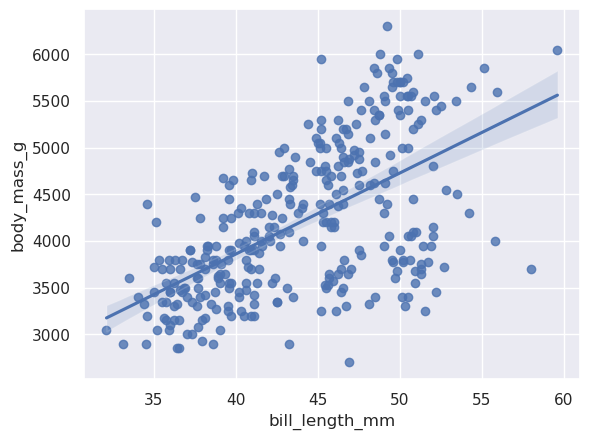

In [28]:
sns.regplot(x = "bill_length_mm", y = "body_mass_g", data = ols_data);

As you learned in previous videos, there are four main model assumptions for simple linear regression, in no particular order:
1. Linearity
2. Normality
3. Independent observations
4. Homoscedasticity

You already checked the linearity assumption by creating the scatterplot matrix. The independent observations assumption is more about data collection. There is no reason to believe that one penguin's body mass or bill length would be related to any other penguin's anatomical measurements. So we can check off assumptions 1 and 3.

The normality and homoscedasticity assumptions focus on the distribution of errors. Thus, you can only check these assumptions after you have constructed the model. To check these assumptions, you will check the residuals, as an approximation of the errors.

To more easily check the model assumptions and create relevant visualizations, you can first subset the X variable by isolating just the `bill_length_mm` column. Additionally, you can save the predicted values from the model using the `model.predict(X)` function.

In [29]:
# Subset X variable
X = ols_data["bill_length_mm"]

# Get predictions from model
fitted_values = model.predict(X)

In [30]:
# Calculate residuals
residuals = model.resid

## Check Normality Assumption

To check the normality assumption, you can create a histogram of the residuals using the `histplot()` function from the `seaborn` package.

From the below histogram, you may notice that the residuals are almost normally distributed. In this case, it is likely close enough that the assumption is met.

---

Another way to check the normality function is to create a quantile-quantile or Q-Q plot. Recall that if the residuals are normally distributed, you would expect a straight diagonal line going from the bottom left to the upper right of the Q-Q plot. You can create a Q-Q plot by using the `qqplot` function from the `statsmodels.api` package.

The Q-Q plot shows a similar pattern to the histogram, where the residuals are mostly normally distributed, except at the ends of the distribution.

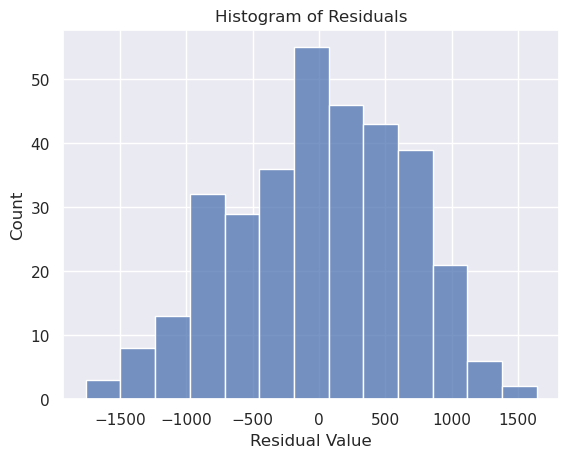

In [31]:
fig = sns.histplot(residuals)
fig.set_xlabel("Residual Value")
fig.set_title("Histogram of Residuals")
plt.show()

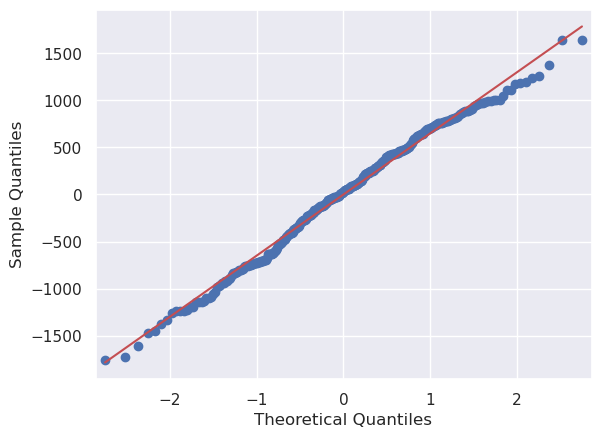

In [32]:
fig = sm.qqplot(model.resid, line = 's')
plt.show()

## Check the homoscedasticity assumption
lastly, we have to check the homoscedasticity assumption. To check the homoscedasticity assumption, you can create a scatterplot of the fitted values and residuals. If the plot resembles a random cloud (i.e., the residuals are scattered randomly), then the assumption is likely met.

You can create one scatterplot by using the `scatterplot()` function from the `seaborn` package. The first argument is the variable that goes on the x-axis. The second argument is the variable that goes on the y-axis.

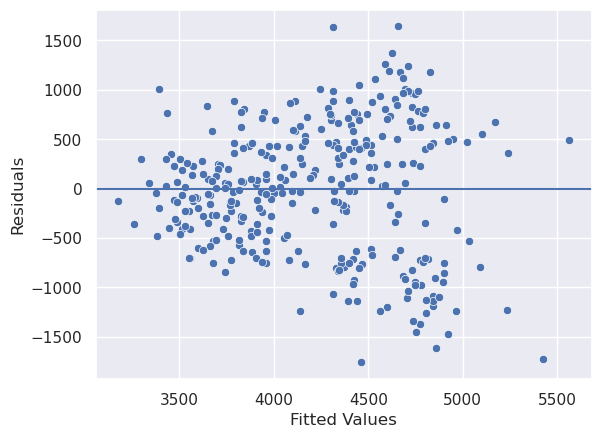

In [33]:
fig = sns.scatterplot(x=fitted_values, y=residuals)

# Add reference line at residuals = 0
fig.axhline(0)

# Set x-axis and y-axis labels
fig.set_xlabel("Fitted Values")
fig.set_ylabel("Residuals")

# Show the plot
plt.show()